## House Price Prediction


Model the price of houses with the available independent variables. The model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Reading and Understanding the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import the csv file
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check the dimension of the dataframe
housing.shape

(1460, 81)

In [4]:
# Check the datatypes and the null values in each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning and Visualisation

In [5]:
# Remove rows with more than 30% missing values.
housing_ver1 = housing[round(100 * (housing.isnull().sum(axis = 1)/len(housing.columns)), 2) < 30]
housing_ver1.shape

(1460, 81)

In [6]:
# Remove columns with more than 70% mising values
thresh = int(0.70 * len(housing_ver1.index))
housing_ver1.dropna(axis = 1, thresh = thresh, inplace = True)
housing_ver1.shape

(1460, 76)

In [7]:
housing_ver1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
# Find the possible values MasVnrType have.
housing_ver1['MasVnrType'].astype('category').value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [9]:
#Find the possible values MasVnrArea have for MasVnrType = None
housing_ver1[housing_ver1['MasVnrType'] == 'None']['MasVnrArea'].unique()

array([  0., 288.,   1., 344., 312.])

In [10]:
housing_ver1[housing_ver1['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]


,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [11]:
#Clearly the NaN values in MasVnrType implies that the given house doesn't have Masonry veneer
#and thus doesn't have any area.Hence can do the following imputation
# 1. MasVnrArea can be replace by 0
# 2. MasVnrType can be replaced by None as mentioned in data dictionary 

housing_ver1['MasVnrArea'].fillna(0, inplace = True)
housing_ver1['MasVnrType'].fillna('None', inplace = True)


In [12]:
housing_ver1['GarageType'].astype('category').value_counts(dropna = False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [13]:
housing_ver1['GarageType'].isnull().sum()

81

In [14]:
# Clearly the NaN values are house not having a garage hence can do the following imputation
#'GarageType',GarageQual','GarageFinish', 'GarageCond' = NA which implies No garage
#and some arbitarary date for GarageYrBlt for instance 1900
housing_ver1['GarageType'].fillna('NA', inplace = True)
housing_ver1['GarageQual'].fillna('NA', inplace = True)
housing_ver1['GarageYrBlt'].fillna(1900.0, inplace = True)
housing_ver1['GarageFinish'].fillna('NA', inplace = True)
housing_ver1['GarageCond'].fillna('NA', inplace = True)

In [15]:
housing_ver1[housing_ver1['BsmtQual'].isnull()][['BsmtQual', 'BsmtCond',
                                                   'BsmtExposure', 'BsmtFinType1',
                                                  'BsmtFinType2']].head()


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN


In [16]:
# Clearly the NaN values are house not having a basement hence can do the following imputation
#'BsmtQual',BsmtCond','BsmtExposure', 'BsmtFinType1', BsmtFinType2 = NA which implies No Basement
housing_ver1['BsmtQual'].fillna('NA', inplace = True)
housing_ver1['BsmtCond'].fillna('NA', inplace = True)
housing_ver1['BsmtExposure'].fillna('NA', inplace = True)
housing_ver1['BsmtFinType1'].fillna('NA', inplace = True)
housing_ver1['BsmtFinType2'].fillna('NA', inplace = True)


In [17]:
#Assign the median value of the LotFrontage with the median value in that neighborhood.
housing_ver1[['LotFrontage', 'LotArea', 'Neighborhood']].head()
housing_ver1['LotFrontage'] = housing_ver1.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [18]:
# Replace the Nan value with the default value
housing_ver1['Electrical'] = housing_ver1['Electrical'].fillna('SBrkr')

In [19]:
#Check the info after data cleaning
housing_ver1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Visualise and handle numeric data

In [20]:
#Id column is not required for modelling so can set it as index as it is sequential
housing_ver1.set_index('Id', inplace = True)

In [21]:
#Find all the numeric columns 
numeric_data = housing_ver1.select_dtypes(['int64', 'float64'])
numeric_col = numeric_data.columns
numeric_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

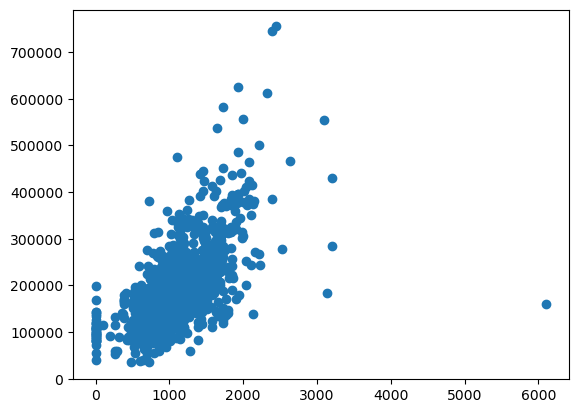

In [22]:
#Clearly 'TotalBsmtSF' is sum of 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF'
#From business perspective can remove other columns
housing_ver1.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1, inplace = True)
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = housing_ver1)


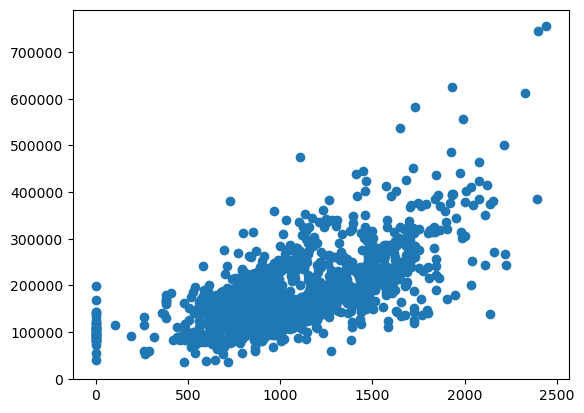

In [23]:
housing_ver1 = housing_ver1[housing_ver1.TotalBsmtSF < 2500]
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = housing_ver1)

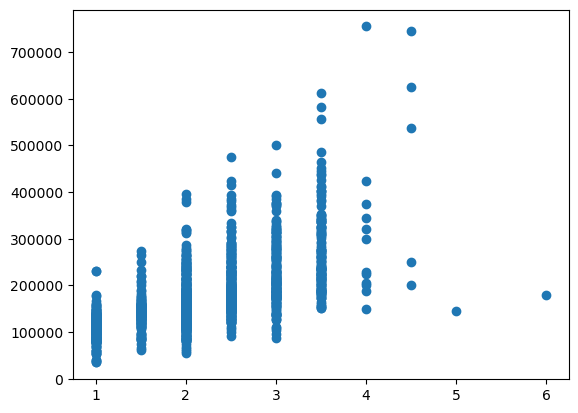

In [24]:
#Create a new colums named 'TotalBaths'
housing_ver1['TotalBaths'] = housing_ver1['BsmtFullBath'] + housing_ver1['FullBath'] + 0.5 * (housing_ver1['BsmtHalfBath'] +housing_ver1['HalfBath'])
plt.scatter(x = 'TotalBaths', y = 'SalePrice', data = housing_ver1)

In [25]:
# Find the correlation between numeric columns
corrmat = housing_ver1.corr()
corrmat

C:\Users\Vimal\AppData\Local\Temp\ipykernel_12580\1755735172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = housing_ver1.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBaths
MSSubClass,1.000000,-0.386308,-0.141779,0.038766,-0.060936,0.030403,0.042459,0.025889,-0.249092,-0.258748,...,-0.005057,-0.010308,-0.044222,-0.025088,0.007909,-0.007948,-0.014202,-0.020568,-0.077291,0.157121
LotFrontage,-0.386308,1.000000,0.307879,0.219296,-0.038978,0.112173,0.075363,0.167885,0.314165,0.386627,...,0.109325,0.009958,0.069235,0.043216,0.095541,0.006723,0.021880,0.004198,0.363663,0.199480
LotArea,-0.141779,0.307879,1.000000,0.090765,-0.002454,0.006883,0.006979,0.083741,0.229779,0.274143,...,0.061734,-0.017178,0.021426,0.044501,0.036529,0.039123,0.006205,-0.013848,0.270417,0.191854
OverallQual,0.038766,0.219296,0.090765,1.000000,-0.087641,0.570206,0.549641,0.396014,0.531718,0.459874,...,0.295444,-0.116965,0.032021,0.062826,0.045534,-0.030878,0.076232,-0.028476,0.793292,0.532229
OverallCond,-0.060936,-0.038978,-0.002454,-0.087641,1.000000,-0.374758,0.075830,-0.123517,-0.173323,-0.142046,...,-0.028896,0.071699,0.025231,0.055414,0.002209,0.068604,-0.004088,0.044378,-0.074249,-0.171121
YearBuilt,0.030403,0.112173,0.006883,0.570206,-0.374758,1.000000,0.591235,0.307453,0.401900,0.278856,...,0.183386,-0.391528,0.031966,-0.051947,-0.004991,-0.034064,0.013762,-0.014169,0.523996,0.521949
YearRemodAdd,0.042459,0.075363,0.006979,0.549641,0.075830,0.591235,1.000000,0.170601,0.295876,0.238354,...,0.222689,-0.195624,0.045801,-0.040288,-0.003294,-0.009984,0.022741,0.035595,0.509511,0.441810
MasVnrArea,0.025889,0.167885,0.083741,0.396014,-0.123517,0.307453,0.170601,1.000000,0.342601,0.319990,...,0.099975,-0.107548,0.020337,0.064301,-0.020275,-0.029249,-0.002962,-0.006725,0.478622,0.303293
TotalBsmtSF,-0.249092,0.314165,0.229779,0.531718,-0.173323,0.401900,0.295876,0.342601,1.000000,0.797709,...,0.216512,-0.113027,0.044371,0.090021,0.038500,-0.017802,0.029310,-0.020223,0.640901,0.399208
1stFlrSF,-0.258748,0.386627,0.274143,0.459874,-0.142046,0.278856,0.238354,0.319990,0.797709,1.000000,...,0.174803,-0.080630,0.062537,0.093981,0.065193,-0.020490,0.047213,-0.014243,0.620536,0.368968


In [26]:
# Take the 10 numeric columns with highest correlation with SalesPrice
plt.figure(figsize = (16,8))
k = 10 #number of variables for heatmap

col = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_ver1[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

NameError: name 'cols' is not defined

<Figure size 1600x800 with 0 Axes>

In [ ]:
#Do statistical analysis of the correlated variables
housing_ver1[cols].describe([0, .25, .5, .75, .95])

In [27]:
# paiwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(housing_ver1[cols])
plt.show()

NameError: name 'cols' is not defined

<Figure size 2000x1000 with 0 Axes>

In [28]:
#Based on data dictionary following columns can be converted to category
category_cols = housing_ver1.select_dtypes('object')
category_cols.columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
print(housing_ver1['MSZoning'].value_counts())
print(housing_ver1['Street'].value_counts())
print(housing_ver1['LotShape'].value_counts())
print(housing_ver1['LandContour'].value_counts())
print(housing_ver1['Utilities'].value_counts())
print(housing_ver1['LotConfig'].value_counts())
print(housing_ver1['LandSlope'].value_counts())
print(housing_ver1['Neighborhood'].value_counts())
# Remove less signifcant columns: the one which only have majority of values in one category only
housing_ver1.drop(['Street', 'Utilities'], axis = 1, inplace = True)

RL         1144
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1447
Grvl       6
Name: Street, dtype: int64
Reg    922
IR1    481
IR2     41
IR3      9
Name: LotShape, dtype: int64
Lvl    1306
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1452
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1046
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1375
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     75
Sawyer      74
NWAmes      72
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


In [30]:
print(housing_ver1['Condition1'].value_counts())
print(housing_ver1['Condition2'].value_counts())
print(housing_ver1['BldgType'].value_counts())
print(housing_ver1['HouseStyle'].value_counts())
print(housing_ver1['RoofStyle'].value_counts())
print(housing_ver1['RoofMatl'].value_counts())
print(housing_ver1['Exterior1st'].value_counts())
# Remove less signifcant columns: the one which only have majority of values in one category only
housing_ver1.drop(['Condition2'], axis = 1, inplace = True)

Norm      1256
Feedr       80
Artery      48
RRAn        26
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1439
Feedr        6
Artery       2
RRNn         2
PosA         1
PosN         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
1Fam      1213
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1Story    721
2Story    443
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
Gable      1140
Hip         280
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
CompShg    1429
Tar&Grv      11
WdShngl       5
WdShake       5
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64
VinylSd    512
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     60
BrkFace     48
WdShing     26
Stucco      24
AsbShng     20
BrkComm      2
Ston

In [31]:
print(housing_ver1['Exterior2nd'].value_counts())
print(housing_ver1['MasVnrType'].value_counts())
print(housing_ver1['ExterQual'].value_counts())
print(housing_ver1['ExterCond'].value_counts())
print(housing_ver1['Foundation'].value_counts())
print(housing_ver1['BsmtQual'].value_counts())
print(housing_ver1['BsmtCond'].value_counts())
print(housing_ver1['BsmtExposure'].value_counts())


VinylSd    501
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     59
Wd Shng     38
Stucco      25
BrkFace     23
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
None       870
BrkFace    443
Stone      125
BrkCmn      15
Name: MasVnrType, dtype: int64
TA    906
Gd    485
Ex     48
Fa     14
Name: ExterQual, dtype: int64
TA    1275
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
PConc     640
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
TA    649
Gd    615
Ex    117
NA     37
Fa     35
Name: BsmtQual, dtype: int64
TA    1304
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
No    950
Av    221
Gd    130
Mn    114
NA     38
Name: BsmtExposure, dtype: int64


In [32]:
print(housing_ver1['BsmtFinType1'].value_counts())
print(housing_ver1['BsmtFinType2'].value_counts())
print(housing_ver1['Heating'].value_counts())
print(housing_ver1['HeatingQC'].value_counts())
print(housing_ver1['CentralAir'].value_counts())
print(housing_ver1['Electrical'].value_counts())
print(housing_ver1['KitchenQual'].value_counts())
print(housing_ver1['Functional'].value_counts())
# Remove less signifcant columns: the one which only have majority of values in one category only
housing_ver1.drop(['BsmtFinType2'], axis = 1, inplace = True)

Unf    430
GLQ    412
ALQ    219
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
Unf    1251
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      18
GLQ      14
Name: BsmtFinType2, dtype: int64
GasA     1421
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Ex    735
TA    427
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Y    1358
N      95
Name: CentralAir, dtype: int64
SBrkr    1328
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
TA    735
Gd    583
Ex     96
Fa     39
Name: KitchenQual, dtype: int64
Typ     1353
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


In [33]:
print(housing_ver1['GarageType'].value_counts())
print(housing_ver1['GarageFinish'].value_counts())
print(housing_ver1['GarageQual'].value_counts())
print(housing_ver1['GarageCond'].value_counts())
print(housing_ver1['PavedDrive'].value_counts())
print(housing_ver1['SaleType'].value_counts())
print(housing_ver1['SaleCondition'].value_counts())


Attchd     864
Detchd     387
BuiltIn     87
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    419
Fin    348
NA      81
Name: GarageFinish, dtype: int64
TA    1304
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1319
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Y    1333
N      90
P      30
Name: PavedDrive, dtype: int64
WD       1262
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Normal     1193
Partial     123
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


<AxesSubplot: xlabel='MSZoning', ylabel='SalePrice'>

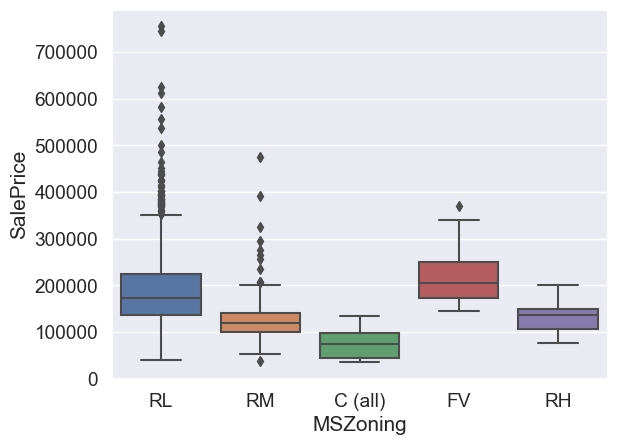

In [34]:
#Analysis the categorical columns
housing_ver1['MSZoning'].value_counts()
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing_ver1)
#Clearly the Floating Village Residential and Residential Low density have more Sales Price
#compared to other Zones.

<AxesSubplot: xlabel='MSSubClass', ylabel='SalePrice'>

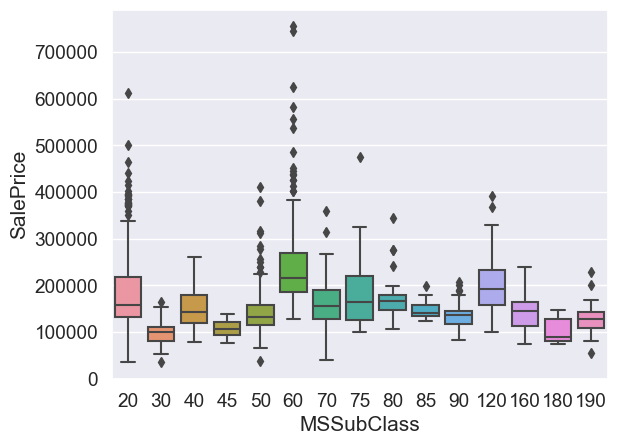

In [35]:

#Analysis the categorical columns
housing_ver1['MSSubClass'].value_counts()
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing_ver1)
#Clearly no pattern between MSSubClass and SalePrice

<AxesSubplot: xlabel='GarageType', ylabel='SalePrice'>

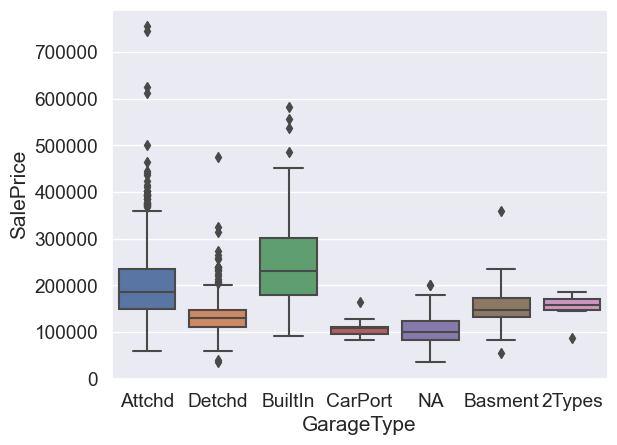

In [36]:
housing_ver1['GarageType'].value_counts()
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing_ver1)
#Clearly the house with Builtin and attchd garage have higher saleprice


## Data Prepartion

In [37]:
#Create a dummy variable for the categorical variable and dropping the first
category_cols = housing_ver1.select_dtypes('object')
dummy_df = pd.get_dummies(housing_ver1[category_cols.columns], drop_first = True)

#Adding the result to the master dataframe
housing_ver2 = pd.concat([housing_ver1, dummy_df], axis = 1)
housing_ver2.shape

(1453, 258)

In [38]:
housing_ver2.drop(category_cols.columns, axis = 1, inplace = True)
housing_ver2.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,856,856,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,920,920,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,756,961,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [39]:
housing_ver2.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 224, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Putting feature variable to X
X = housing_ver2.drop(['SalePrice'], axis=1)

X.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,856,856,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,920,920,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,756,961,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [42]:
y = housing_ver2['SalePrice']

### Train test split

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
numeric_col = X_train.select_dtypes(['int64', 'float64']).columns
numeric_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'TotalBaths'],
      dtype='object')

In [46]:
scaler = StandardScaler()

X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

## Modeling

Use cross validation with rfe to find optimal number of features

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [48]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(10, 40))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30,
                                                   31, 32, 33, 34, 35, 36, 37,
                                                   38, 39]}],
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.866932,0.016091,0.004326,0.005809,10,{'n_features_to_select': 10},6.798714e-01,0.538274,0.646646,0.447405,...,5.896694e-01,8.535068e-02,24,0.656957,0.669941,0.619435,0.562121,0.692073,0.640105,0.045571
1,0.874069,0.031819,0.004740,0.005592,11,{'n_features_to_select': 11},7.101563e-01,0.545859,0.676959,0.485333,...,6.108795e-01,8.348369e-02,23,0.677915,0.671076,0.639574,0.595027,0.692274,0.655173,0.034663
2,0.876502,0.038074,0.006849,0.007246,12,{'n_features_to_select': 12},7.072093e-01,0.556188,0.678176,0.593169,...,6.341538e-01,5.483970e-02,22,0.692903,0.677177,0.640641,0.649337,0.692473,0.670506,0.021766
3,0.885137,0.033912,0.000403,0.000805,13,{'n_features_to_select': 13},7.185155e-01,0.614408,0.676884,0.597556,...,6.487058e-01,4.385732e-02,21,0.705826,0.701541,0.642896,0.653218,0.692635,0.679223,0.026006
4,0.901402,0.016023,0.000000,0.000000,14,{'n_features_to_select': 14},7.181439e-01,0.614495,0.765551,0.597620,...,6.662230e-01,6.465268e-02,19,0.706173,0.701732,0.728698,0.654376,0.693276,0.696851,0.024256
5,0.870552,0.013320,0.003127,0.006253,15,{'n_features_to_select': 15},7.181439e-01,0.614153,0.765714,0.597620,...,6.661890e-01,6.475663e-02,20,0.706173,0.701930,0.728904,0.654376,0.693294,0.696936,0.024318
6,0.891242,0.011536,0.003110,0.006220,16,{'n_features_to_select': 16},7.181877e-01,0.614231,0.765700,0.606835,...,6.682735e-01,6.275921e-02,18,0.706212,0.702066,0.728966,0.670663,0.693312,0.700244,0.018905
7,0.897479,0.009586,0.003126,0.006252,17,{'n_features_to_select': 17},7.181877e-01,0.771003,0.765757,0.613440,...,7.097118e-01,5.849863e-02,17,0.706212,0.842303,0.729006,0.672499,0.773151,0.744634,0.058782
8,0.913336,0.011747,0.003125,0.006250,18,{'n_features_to_select': 18},7.178761e-01,0.771244,0.765385,0.643405,...,7.160071e-01,4.880967e-02,16,0.706250,0.842504,0.729613,0.687750,0.773539,0.747931,0.055307
9,0.903638,0.017212,0.003126,0.006253,19,{'n_features_to_select': 19},7.178250e-01,0.772973,0.869211,0.647215,...,7.376885e-01,7.786126e-02,15,0.706254,0.844145,0.846303,0.718614,0.773625,0.777788,0.059554


In [50]:
model_cv.best_params_

{'n_features_to_select': 39}

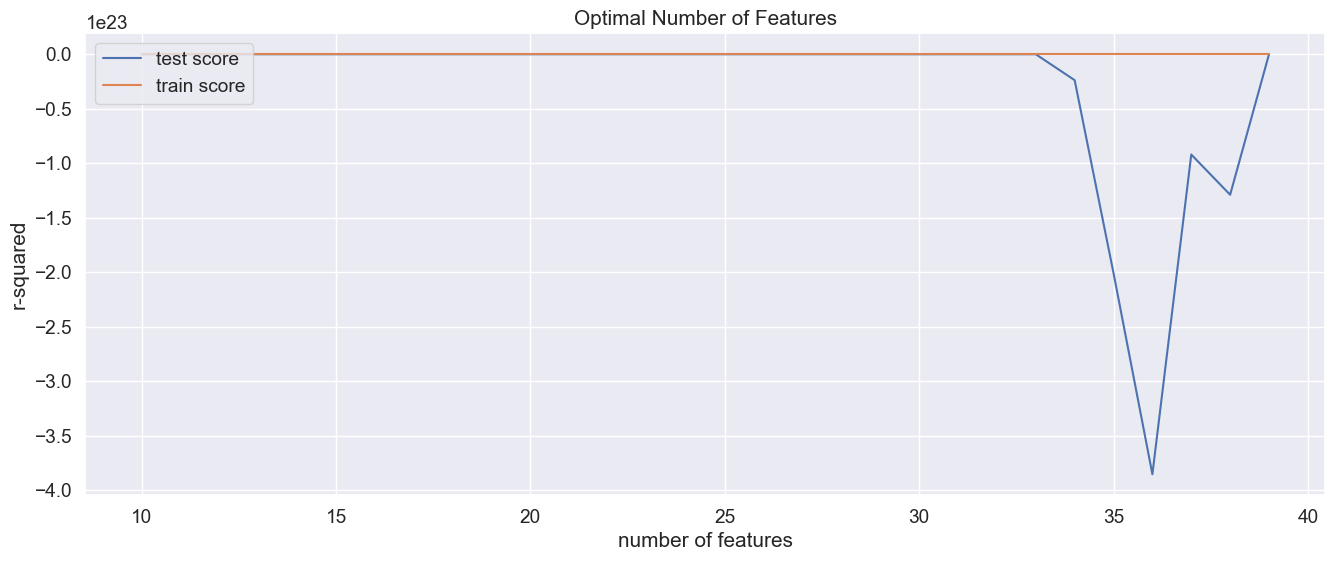

In [51]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [52]:
# Will go ahead with 38 features
rfe = RFE(lm, 29)             # running RFE with 13 variables as output
model_rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train = X_train[col]
X_test = X_test[col]
print(len(X_test.columns))
print(len(X_train.columns))

In [ ]:
# list of alphas to tune
params = {'alpha': [..01, .1, 10, 20, 30, 50, 100, 200, 300, 400]}


In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
alpha = 100
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

In [ ]:
lasso.coef_

In [ ]:
lasso.score(X_train, y_train)

In [ ]:
num_vars = X_test.select_dtypes(['int64', 'float64']).columns

y_test_pred = lasso.predict(X_test)


In [ ]:
lasso.score(X_test, y_test)

In [ ]:
list(zip(lasso.coef_, X_train.columns))
    

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective coefficients
features = pd.DataFrame()
features['Features'] = X_train[col].columns
features['coeff'] = lasso.coef_
features['coeff'] = round(features['coeff'], 2)
features = features.sort_values(by = "coeff", ascending = False)
features

#Clearly the top 10 most important varibles are 
KitchenQual_Fa (-ve coorelation)
KitchenQual_TA (-ve coorelation)
BsmtQual_TA (-ve coorelation)
ExterQual_Fa (-ve coorelation)

Neighborhood_NoRidge (+ve coorelation)

KitchenQual_Gd (-ve coorelation)
BldgType_Duplex (-ve coorelation)

BsmtExposure_Gd ((+ve coorelation))

BsmtQual_Fa (-ve coorelation)
ExterQual_TA (-ve coorelation)



In [ ]:
ridge = Ridge()
params = {'alpha': [.001, .01, .1,.2, .3, .4, .5, .6, .7, .8, .9, 1, 5, 10, 15]}
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

In [ ]:
# plotting mean test and train scoes with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

In [ ]:
ridge.score(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)